In [37]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import nltk
from matplotlib import pyplot as plt
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import seaborn as sns


In [2]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
df=pd.read_csv("BBC_NEWS.csv")
df.shape

(2225, 3)

In [5]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [6]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [7]:
df.drop("ArticleId",axis=1,inplace=True)

In [8]:
df['category_id'] = df['Category'].factorize()[0]

In [9]:
df.head()

,Text,Category,category_id
0,worldcom ex-boss launches defence lawyers defe...,business,0
1,german business confidence slides german busin...,business,0
2,bbc poll indicates economic gloom citizens in ...,business,0
3,lifestyle governs mobile choice faster bett...,tech,1
4,enron bosses in $168m payout eighteen former e...,business,0


In [10]:
stopwords = nltk.corpus.stopwords.words('english')
'''text_file = open("stopwords.txt", "r")
stopwords = text_file.read().split('\n')'''

'text_file = open("stopwords.txt", "r")\nstopwords = text_file.read().split(\'\n\')'

In [11]:
df['news_without_stopwords'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [12]:
print(len(df['news_without_stopwords'][0]))

1455


In [13]:
print(df['news_without_stopwords'])

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens maj...
3       lifestyle governs mobile choice faster better ...
4       enron bosses $168m payout eighteen former enro...
                              ...                        
1396    south africa sweep top awards south africa sch...
1397    power people says hp digital revolution focuse...
1398    banker loses sexism claim former executive lon...
1399    wmc says xstrata bid low australian mining fir...
1400    yukos unit buyer faces loan claim owners embat...
Name: news_without_stopwords, Length: 1401, dtype: object


In [14]:
ps = PorterStemmer()

In [15]:
df['news_porter_stemmed'] = df['news_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [16]:
print(df['news_without_stopwords'][0])

worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers battery fraud charges called company whistleblower first witness. cynthia cooper worldcom ex-head internal accounting alerted directors irregular accounting practices us telecoms giant 2002. warnings led collapse firm following discovery $11bn (£5.7bn) accounting fraud. mr ebbers pleaded guilty charges fraud conspiracy. prosecution lawyers argued mr ebbers orchestrated series accounting tricks worldcom ordering employees hide expenses inflate revenues meet wall street earnings estimates. ms cooper runs consulting business told jury new york wednesday external auditors arthur andersen approved worldcom accounting early 2001 2002. said andersen given green light procedures practices used worldcom. mr ebber lawyers said unaware fraud arguing auditors alert problems. ms cooper also said shareholder meetings mr ebbers often passed technical questions company finance chief giving brief answers himself. pr

In [17]:
print(df['news_porter_stemmed'][0])

worldcom ex-boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first witness. cynthia cooper worldcom ex-head intern account alert director irregular account practic us telecom giant 2002. warn led collaps firm follow discoveri $11bn (£5.7bn) account fraud. mr ebber plead guilti charg fraud conspiracy. prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estimates. ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002. said andersen given green light procedur practic use worldcom. mr ebber lawyer said unawar fraud argu auditor alert problems. ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer himself. prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book . ho

In [18]:
df['news_porter_stemmed'] = df['news_porter_stemmed'].str.replace('[^\w\s]','')

<ipython-input-18-90dbc40a32ec>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['news_porter_stemmed'] = df['news_porter_stemmed'].str.replace('[^\w\s]','')


In [19]:
df['news_porter_stemmed'] = df['news_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [20]:
df['news_porter_stemmed'][0]

'worldcom exboss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first witness cynthia cooper worldcom exhead intern account alert director irregular account practic us telecom giant 2002 warn led collaps firm follow discoveri 11bn 57bn account fraud mr ebber plead guilti charg fraud conspiracy prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estimates ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002 said andersen given green light procedur practic use worldcom mr ebber lawyer said unawar fraud argu auditor alert problems ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer himself prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book howev ms cooper sai

In [21]:
l=[]
for i in df['news_porter_stemmed']:
    l.append(len(i))
l.sort()
min_words=l[0]
max_words=sum(l)/len(l)
print(min_words,max_words)

308 1391.3433261955745


In [22]:
df.head()

,Text,Category,category_id,news_without_stopwords,news_porter_stemmed
0,worldcom ex-boss launches defence lawyers defe...,business,0,worldcom ex-boss launches defence lawyers defe...,worldcom exboss launch defenc lawyer defend fo...
1,german business confidence slides german busin...,business,0,german business confidence slides german busin...,german busi confid slide german busi confid fe...
2,bbc poll indicates economic gloom citizens in ...,business,0,bbc poll indicates economic gloom citizens maj...,bbc poll indic econom gloom citizen major nati...
3,lifestyle governs mobile choice faster bett...,tech,1,lifestyle governs mobile choice faster better ...,lifestyl govern mobil choic faster better funk...
4,enron bosses in $168m payout eighteen former e...,business,0,enron bosses $168m payout eighteen former enro...,enron boss 168m payout eighteen former enron d...


In [23]:
freq = pd.Series(' '.join(df['news_porter_stemmed']).split()).value_counts()

In [24]:
freq.head()

said     4533
mr       1860
would    1617
year     1586
also     1317
dtype: int64

In [25]:
freq2 = freq[freq <= 3]
freq2

3ami         3
mccune       3
viadana      3
francais     3
89           3
            ..
hernych      1
dancev       1
goldstein    1
collegi      1
fireston     1
Length: 14812, dtype: int64

In [26]:
freq3 = list(freq2.index.values)
freq3

['3ami',
 'mccune',
 'viadana',
 'francais',
 '89',
 'statut',
 'wikid',
 'boynton',
 'stormi',
 'mama',
 'elected',
 'paralys',
 'lavish',
 'milton',
 'uv',
 'coltran',
 'sink',
 'tetri',
 'girvan',
 'addressed',
 'ipswich',
 'charad',
 'nogar',
 'credenti',
 'metatars',
 'pops',
 'ide',
 'shalabi',
 'gunit',
 'wendi',
 'zidan',
 'disreput',
 'brownsword',
 'certainti',
 'cairo',
 'netski',
 'tiago',
 'rake',
 'damages',
 'suicide',
 'controls',
 'gigapixel',
 'fork',
 'angi',
 'disadvantage',
 'image',
 'tno',
 'mukherje',
 'cheung',
 'creativity',
 'fm',
 'equality',
 'banter',
 'cheadle',
 'scent',
 'goalless',
 'shops',
 'alfonso',
 'delux',
 'gaydo',
 'suffering',
 'vaniti',
 'lana',
 'stoica',
 'unspecifi',
 'epitomis',
 'exxonmobil',
 'malwar',
 'multimillion',
 'renown',
 '262',
 'alessandro',
 'prosecution',
 'hunts',
 '54bn',
 'seagram',
 'detroit',
 'turk',
 'chemistri',
 'commonplace',
 'midsiz',
 'plummet',
 'rave',
 'sung',
 'elhorga',
 'redesign',
 'suzuki',
 'honeynet'

In [27]:
#df['news_porter_stemmed'] = df['news_porter_stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq3)]))

In [28]:
data = df[['Category', 'category_id', 'news_porter_stemmed']]

In [29]:
data.head()

,Category,category_id,news_porter_stemmed
0,business,0,worldcom exboss launch defenc lawyer defend fo...
1,business,0,german busi confid slide german busi confid fe...
2,business,0,bbc poll indic econom gloom citizen major nati...
3,tech,1,lifestyl govern mobil choic faster better funk...
4,business,0,enron boss 168m payout eighteen former enron d...


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [31]:
features = tfidf.fit_transform(data.news_porter_stemmed).toarray()
labels = data.category_id
features.shape

(1401, 9188)

In [32]:
data.columns = ['newstype', 'category_id', 'news_porter_stemmed']
category_id_df = data[['newstype', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'newstype']].values)

In [425]:
'''from sklearn.feature_selection import chi2

N = 5
for newstype, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(newstype))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))'''

'from sklearn.feature_selection import chi2\n\nN = 5\nfor newstype, category_id in sorted(category_to_id.items()):\n    features_chi2 = chi2(features, labels == category_id)\n    indices = np.argsort(features_chi2[0])\n    feature_names = np.array(tfidf.get_feature_names())[indices]\n    unigrams = [v for v in feature_names if len(v.split(\' \')) == 1]\n    bigrams = [v for v in feature_names if len(v.split(\' \')) == 2]\n    print("# \'{}\':".format(newstype))\n    print("  . Most correlated unigrams:\n       . {}".format(\'\n       . \'.join(unigrams[-N:])))\n    print("  . Most correlated bigrams:\n       . {}".format(\'\n       . \'.join(bigrams[-N:])))'

In [34]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [424]:
'''for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()'''

'for category, category_id in sorted(category_to_id.items()):\n    points = projected_features[(labels[indices] == category_id).values]\n    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)\nplt.title("tf-idf feature vector for each article, projected on 2 dimensions.",\n          fontdict=dict(fontsize=15))\nplt.legend()'

In [38]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(features, labels, test_size=0.3, random_state=123)

In [40]:
clf=LazyClassifier()
models,predictions=clf.fit(x_train,x_test,y_train,y_test)

100%|██████████| 29/29 [14:26<00:00, 29.89s/it]


In [41]:
print(models)

                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
Perceptron                       0.98               0.98    None      0.98   
LinearSVC                        0.98               0.98    None      0.98   
PassiveAggressiveClassifier      0.98               0.98    None      0.98   
LogisticRegression               0.98               0.98    None      0.98   
CalibratedClassifierCV           0.98               0.98    None      0.98   
RidgeClassifier                  0.96               0.96    None      0.96   
RidgeClassifierCV                0.96               0.96    None      0.96   
SGDClassifier                    0.96               0.96    None      0.96   
NearestCentroid                  0.96               0.96    None      0.96   
ExtraTreesClassifier             0.95               0.94    None      0.95   
BernoulliNB                      0.94               0.94    None

In [42]:
print(predictions)

                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
Perceptron                       0.98               0.98    None      0.98   
LinearSVC                        0.98               0.98    None      0.98   
PassiveAggressiveClassifier      0.98               0.98    None      0.98   
LogisticRegression               0.98               0.98    None      0.98   
CalibratedClassifierCV           0.98               0.98    None      0.98   
RidgeClassifier                  0.96               0.96    None      0.96   
RidgeClassifierCV                0.96               0.96    None      0.96   
SGDClassifier                    0.96               0.96    None      0.96   
NearestCentroid                  0.96               0.96    None      0.96   
ExtraTreesClassifier             0.95               0.94    None      0.95   
BernoulliNB                      0.94               0.94    None

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, criterion='entropy'),
    MultinomialNB(),
    ComplementNB(),
    LogisticRegression(random_state=0),
]
CV = 5
l=[]
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
entries


[('RandomForestClassifier', 0, 0.9359430604982206),
 ('RandomForestClassifier', 1, 0.9142857142857143),
 ('RandomForestClassifier', 2, 0.9678571428571429),
 ('RandomForestClassifier', 3, 0.9607142857142857),
 ('RandomForestClassifier', 4, 0.9714285714285714),
 ('MultinomialNB', 0, 0.9572953736654805),
 ('MultinomialNB', 1, 0.9535714285714286),
 ('MultinomialNB', 2, 0.9714285714285714),
 ('MultinomialNB', 3, 0.9821428571428571),
 ('MultinomialNB', 4, 0.975),
 ('ComplementNB', 0, 0.9715302491103203),
 ('ComplementNB', 1, 0.9642857142857143),
 ('ComplementNB', 2, 0.975),
 ('ComplementNB', 3, 0.9857142857142858),
 ('ComplementNB', 4, 0.9857142857142858),
 ('LogisticRegression', 0, 0.9715302491103203),
 ('LogisticRegression', 1, 0.9607142857142857),
 ('LogisticRegression', 2, 0.9714285714285714),
 ('LogisticRegression', 3, 0.9892857142857143),
 ('LogisticRegression', 4, 0.9785714285714285)]

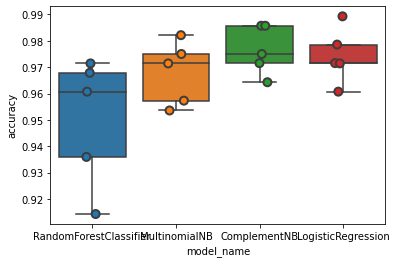

In [44]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,size=8, jitter=True, edgecolor="gray", linewidth=2)

In [415]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB as CNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.3, random_state=42)



In [416]:
#model=CNB()
#model=MultinomialNB()
#model=LogisticRegression()
#model=RandomForestClassifier(n_estimators=360,criterion='entropy')
#model=LinearSVC()
#model=Perceptron()
model=PassiveAggressiveClassifier()
#model=CalibratedClassifierCV()


In [417]:
model.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [418]:
predicted_test = model.predict(x_test)

In [419]:
from sklearn.metrics import classification_report,accuracy_score

In [420]:
print(classification_report(y_test,predicted_test))
k=cross_val_score(model, features, labels, scoring='accuracy')
for fold_idx, accuracy in enumerate(k):
        print(accuracy)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        87
           1       0.96      0.98      0.97        83
           2       0.97      0.99      0.98        87
           3       1.00      1.00      1.00        94
           4       0.99      0.97      0.98        70

    accuracy                           0.98       421
   macro avg       0.98      0.98      0.98       421
weighted avg       0.98      0.98      0.98       421

0.9679715302491103
0.975
0.9714285714285714
0.9928571428571429
0.9892857142857143


In [421]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted_test)*100)

98.33729216152018
